<a href="https://colab.research.google.com/github/monozi/CCMACLRL_EXERCISES_COM221ML/blob/main/Exercise_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

In [4]:
# put your answer here
df = pd.read_excel("personality.xlsx")
print("First 5 rows:\n", df.head())
print("\nLast 5 rows:\n", df.tail())

First 5 rows:
       Name  Post/Share Frequently?  Active in social media?  \
0     Brix                       0                        1   
1   Joshua                       0                        1   
2     John                       1                        1   
3  Fortune                       1                        1   
4     Jiji                       1                        1   

   Replies to comments?  Number of friends/followers  Personality  
0                     1                          301            0  
1                     1                           28            0  
2                     1                          408            1  
3                     1                          180            0  
4                     1                           78            0  

Last 5 rows:
        Name  Post/Share Frequently?  Active in social media?  \
45    Nicko                       1                        1   
46    Jasen                       1                    

1. Display the summary of all the features of the dataset using `.info()`

In [5]:
# put your answer here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Name                         50 non-null     object
 1   Post/Share Frequently?       50 non-null     int64 
 2   Active in social media?      50 non-null     int64 
 3   Replies to comments?         50 non-null     int64 
 4   Number of friends/followers  50 non-null     int64 
 5   Personality                  50 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.5+ KB


2. Display the total number of samples from each label using `.value_counts()`

In [6]:
# put your answer here
df.value_counts()

,,,,,,count
Name,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality,
Aisha,1,1,0,233,0,1
Michael,0,1,1,62,0,1
Jillian,1,1,0,256,0,1
John,1,1,1,408,1,1
Joshua,0,1,1,28,0,1
Kamira,1,1,0,491,0,1
Karl,0,1,1,230,1,1
Kean,0,1,1,490,0,1
Kristel,0,1,0,806,0,1


## C. Split the dataset into training and test set

3. Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [7]:
# put your answer here

X = df.drop(columns = ['Name','Personality']).values
print("Number of shape:", X.shape)
print("Number of dimension:", X.ndim)

Number of shape: (50, 4)
Number of dimension: 2


4. Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [8]:
# put your answer here
y = df['Personality'].values
print("Number of shape:", y.shape)
print("Number of dimension:", y.ndim)

Number of shape: (50,)
Number of dimension: 1


5. Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [9]:
# put your answer here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=40)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(45, 4)
(45,)
(5, 4)
(5,)


## D. Create the model

6. Use KNN as a classifier by using `KNeighborsClassifier()`

In [10]:
# put your answer here
knn = KNeighborsClassifier(n_neighbors=1)
print(knn)

KNeighborsClassifier(n_neighbors=1)


7. Train the model using the `.fit()`

In [11]:
# put your answer here
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

8. Test the model using the `.predict()`

In [12]:
# put your answer here
y_pred = knn.predict(X_test)
print(y_pred)

[1 1 0 0 0]


## Evaluate the model

9. Create a confusion matrix

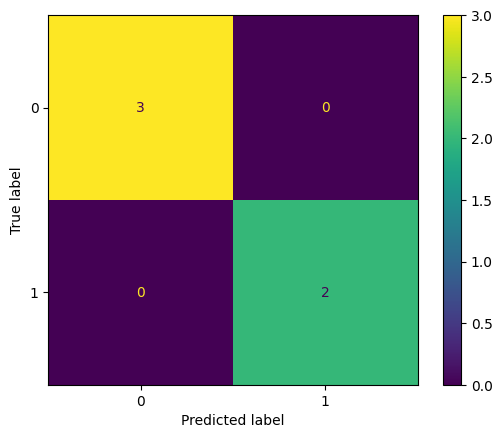

In [13]:
# put your answer here
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

10. Display the accuracy

In [14]:
# put your answer here
metrics.accuracy_score(y_test, y_pred)

1.0

11. Display the precision

In [15]:
# put your answer here
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [1. 1.]


12. Display the recall

In [16]:
# put your answer here
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [1. 1.]


13. Display the f1-score

In [17]:
# put your answer here
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)

f1-score: [1. 1.]


In [18]:
knn.predict([[0, 1, 0, 1000]])
#INTROVERT SI SIR ^_^

array([0])

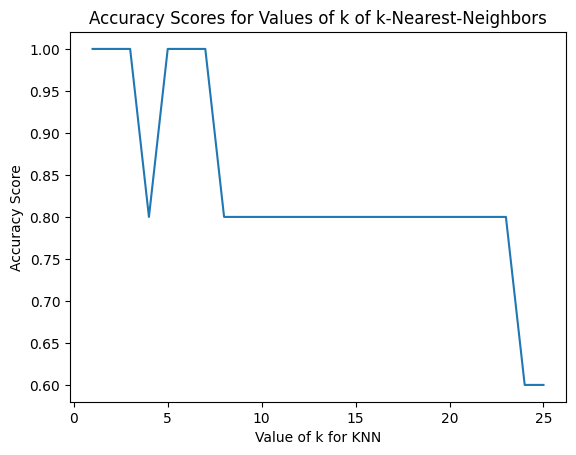

In [19]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []

for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Test the model
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()